In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

## Reading [Smoke Detection](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/) dataset

[Real-time Smoke Detection with AI-based Sensor Fusion](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6)

In [109]:
smoke_train = pd.read_csv("./smoke_detection_iot.csv")
smoke_edited = smoke_train.drop(columns=['Index', 'UTC', 'CNT'])
smoke_edited.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [110]:
smoke_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


## Processing Smoke detection

In [111]:
smoke_edited.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [112]:
# smoke_edited['TVOC[ppb]'] = LabelEncoder().fit_transform(smoke_edited['TVOC[ppb]'])
# smoke_edited.info()
# sns.histplot(data=smoke_train, x='Raw Ethanol')

## Split data

In [113]:
X = smoke_edited.drop(['Fire Alarm'], axis = 1)
y = smoke_edited['Fire Alarm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Standartization

In [114]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [115]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

## KNN model

In [116]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [117]:
pred = knn.predict(scaled_X_test)

## Evaluation

In [118]:
print(confusion_matrix(y_test,pred))

[[3544    5]
 [  15 8962]]


In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3549
           1       1.00      1.00      1.00      8977

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


In [120]:
print(accuracy_score(y_test,pred))

0.9984033210921284


## Choosing parameter K

In [121]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

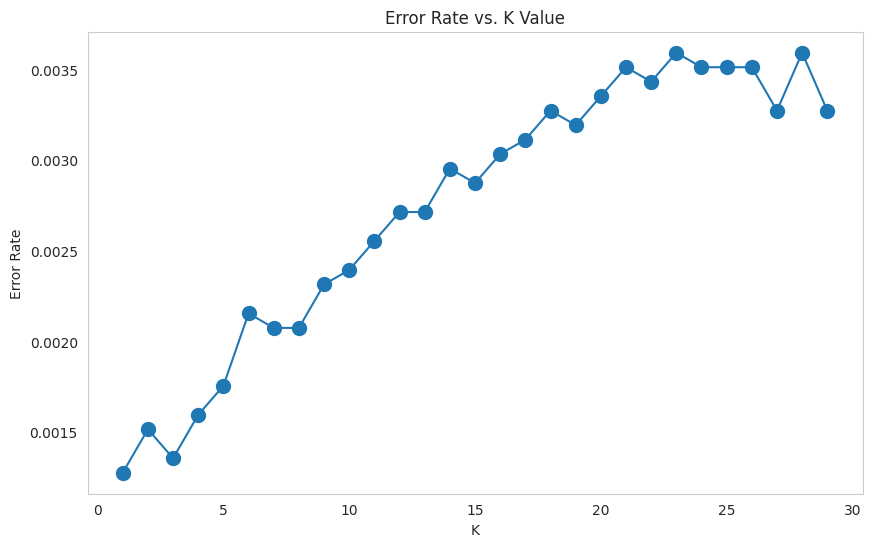

In [122]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [124]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[3529   20]
 [  22 8955]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3549
           1       1.00      1.00      1.00      8977

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


https://stats.stackexchange.com/questions/384542/how-to-prevent-overfitting-with-knn